In [3]:
# %load font.py
#!/usr/bin/env python

# In[ ]:


import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False



NameError: name 'plt' is not defined

In [ ]:
# 하나의 피규어에 하나의 그래프
plt.figure(figsize=(10,2)) # 사이즈 : Inch
plt.title('New figure')
plt.plot(np.random.randn(100))
plt.show()

In [ ]:
# subplot : 하나의 피규어에 여러 그래프

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2) 

ax1 = plt.subplot(2,1,1)                # 초기화를 위한(행, 열), 인덱스
plt.plot(x1, y1, 'yo-')
plt.title('A table of 2 subplot')
plt.ylabel('Damped oscillation')
print(ax1)

ax2 = plt.subplot(2,1,2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time')
plt.ylabel('Undamped')
plt.show()

In [ ]:
# 선 그래프
# 시도별 전출입 인구수

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./dataset/data/시도별 전출입 인구수.xlsx', header = 0)

df.head(2)

In [ ]:
# 전출지의 Nan 자료를 수정 -> 이전 자료의 값으로 대체
df.fillna(method='ffill',inplace=True)
df.head(2)

In [ ]:
# 서울특별시에서 다른 지역으로 전출한 자료만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

# '전출지별'은 같은 자료이므로 삭제
df_seoul.drop('전출지별', axis=1, inplace=True)

# '전입지별'을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

# 전입지 컬럼을 인덱스로 변경
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(2)

In [ ]:
# 서울에서 경기도로 전입한 인구수를 그래프로 확인
sr_one = df_seoul.loc['경기도']
sr_one.head(2)

In [ ]:
plt.figure(figsize=(15,5))                       # 그래프 사이즈 지정
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize=10, color='r')
plt.xticks(size=10, rotation='vertical')         # x축에 데이터를 세로로 회전
plt.title("서울에서 경기도로 이전한 인구수")
plt.xlabel('연도')
plt.ylabel('이동 인구 수')
plt.legend(labels=['서울 -> 경기도'], loc = 'upper right', fontsize = 13)
plt.show()


In [ ]:
# annotate 추가

plt.ylim(50000, 80000)
plt.annotate('',
            xy = (20,620000),       # 화살표 시작점
            xytext=(2,290000),      # 화살표 끝점
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='blue', lw=3))

plt.annotate('인구 이동 증가(1970 - 1995)',
            xy = (10,380000),       # x,y 좌표
            rotation=22,
            va='baseline',           # center, top, bottom, baseline
            ha='center',
            fontsize=14)

# plt.show()

In [ ]:
df_seoul.plot()

In [ ]:
# 그래프를 matplotlib를 사용
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_path = 'C://Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [ ]:
# 서울에서 제주도로 이동한 인구수만 검색해서 그래프로 나타내기

df_j = df[(df['전출지별'] == '서울특별시') & (df['전입지별'] == '제주특별자치도')]

df_j = df_j.drop('전출지별', axis =1)
df_j = df_j.set_index('전입지별')
sr_j = df_j.loc['제주특별자치도']


plt.figure(figsize = (20,5))
plt.plot(sr_j.index, sr_j.values)
plt.xticks(size=10, rotation='vertical')
plt.show

In [ ]:
# 서울 -> 경기도 : sr_one
# 서울 -> 제주도 : sr_j

fig = plt.figure(figsize=(15,10))

# subplot에서는 대체로 set_함수이름 방식으로 진행됨
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# ax1에 서울 -> 경기도 : sr_one
ax1.plot(sr_one, 'o-', color='b',ms=10, label='서울 -> 경기')
ax2.plot(sr_j,   '^-', color='r',ms=10, label='서울 -> 제주')

ax1.set_title('서울 경기 인구 이동')
ax2.set_title('서울 제주 인구 이동')

ax1.legend(loc='best')
ax2.legend(loc='best')

# y축 범위 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
# ax2.set_ylim(50000, 800000)

# x축 연도 라벨 지정 -> 75도 기울여서
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_j.index, rotation=75)

# 눈금 라벨 크기
ax1.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='x', labelsize=10)

plt.show()

In [ ]:
# 하나의 axes에 여러 개의 그래프를 추가로 그림
# 충청남도, 경상북도, 강원도, 1970 ~ 2018년 까지의 자료만 검색
col_years = list(map(str, range(1970,2018)))

df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'],col_years]
df_1

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_1.loc['충청남도',:], marker ='o' , color='olive', label='서울 -> 충남')
ax.plot(col_years, df_1.loc['경상북도',:], marker ='o' , color='red', label='서울 -> 경상')
ax.plot(col_years, df_1.loc['강원도',:], marker ='o' , color='blue', label='서울 -> 강원')

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경상, 강원 인구이동')
ax.set_xlabel('기간')
ax.set_ylabel('인구 이동 수')
ax.set_xticklabels(col_years, rotation= 75)
plt.show()

In [ ]:
df_seoul.index
# '전라남도','충청남도', '경상남도','경기도'
df_m = df_seoul.loc[['전라남도','충청남도', '경상남도','강원도'],:]
df_m

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(2,2,1)

ax.plot(col_years, df_m.loc['전라남도',:], marker ='o' , color='olive', label='서울 -> 전남')
ax.set_xticklabels(col_years, rotation= 75)
ax = fig.add_subplot(2,2,2)

ax.plot(col_years, df_m.loc['충청남도',:], marker ='o' , color='red', label='서울 -> 충남')
ax.set_xticklabels(col_years, rotation= 75)

ax = fig.add_subplot(2,2,3)
ax.plot(col_years, df_m.loc['경상남도',:], marker ='o' , color='blue', label='서울 -> 경남')
ax.set_xticklabels(col_years, rotation= 75)

ax = fig.add_subplot(2,2,4)
ax.plot(col_years, df_m.loc['강원도',:], marker ='o' , color='black', label='서울 -> 강원')
ax.set_xticklabels(col_years, rotation= 75)

plt.show()

In [ ]:
# 행열 위치 바꾸기
df_T = df_m.T
# 인덱스 int로 바꾸기
df_T.index = df_T.index.map(int)
df_T.index

In [ ]:
ax = df_T.plot(kind='area', figsize = (20,10), alpha = 0.4, stacked= False)
ax.set_title('서울 -> 타 도시 인구 이동수')
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기 간')
ax.legend(loc = 'best', fontsize=16)

plt.show()

In [ ]:
# 히스토그램
ax = df_T.plot(kind='barh', figsize = (20,10), alpha = 0.4, width = 0.8) # kind를 bar 혹은 barh로 주면 됌
ax.set_title('서울 -> 타 도시 인구 이동수')
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기 간')
ax.legend(loc = 'best', fontsize=16)

plt.show()

In [4]:
# 남북한 전력 발전량
df = pd.read_excel('./dataset/data/남북한발전전력량.xlsx')

# 북한 데이터만 가져오기
df = df.iloc[5:9]
df = df.drop('전력량 (억㎾h)', axis =1)
df = df.set_index('발전 전력별')
df = df.rename({'합계':'총발전량'})
df = df.T
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [5]:
# 총발전량 - 1년 -> 이전년도의 총발전량
df['총발전량 - 1년'] = df['총발전량'].shift(1)

# 증감율 (총발전량 / 이전 년도의 발전량 -1) * 100
df['증감율'] = ((df['총발전량']/df['총발전량 - 1년'])-1) * 100

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from c

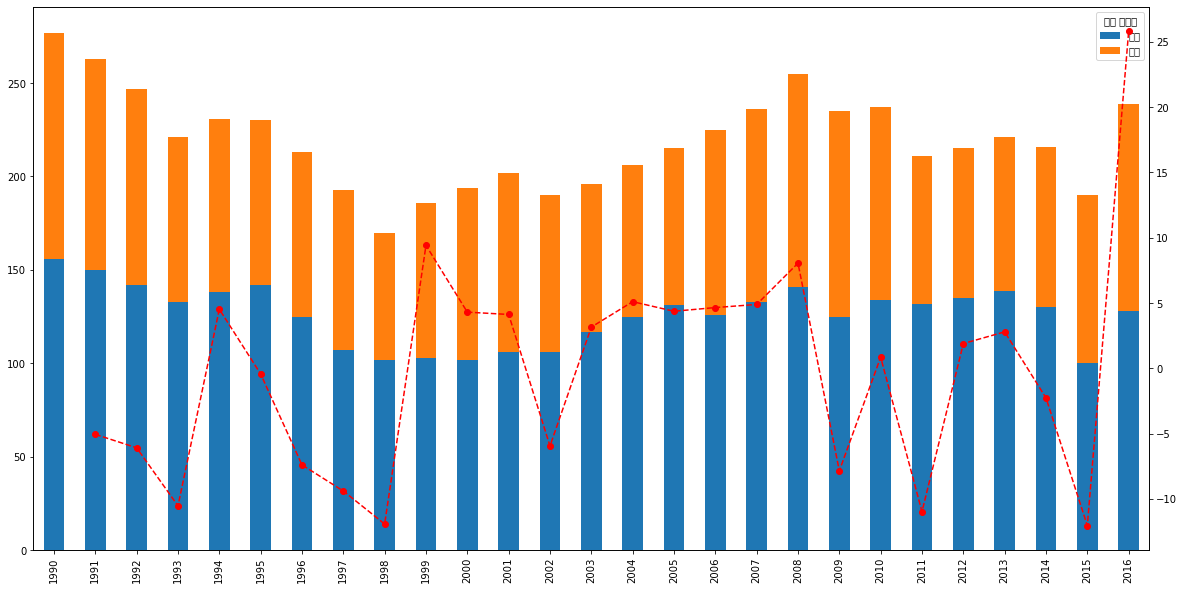

In [6]:
# 그래프 그리기 : 수력, 화력 -> 증감율
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), stacked=True)
ax2 = ax1.twinx()

ax2.plot(df.index, df['증감율'], ls='--', marker='o', color='red', label='전년대비 증감율(%)')



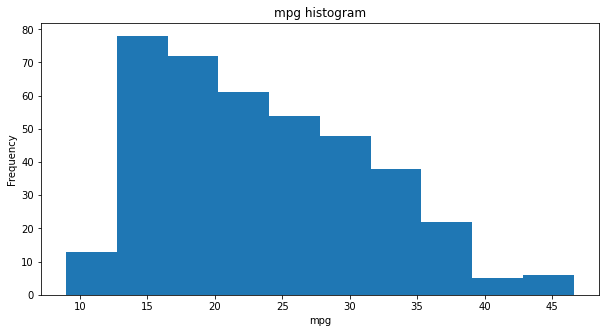

In [9]:
# histogram : 변수 하나
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/auto-mpg.csv')

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df['mpg'].plot(kind='hist', bins=10, figsize=(10,5))
plt.title('mpg histogram')
plt.xlabel('mpg')
plt.show()


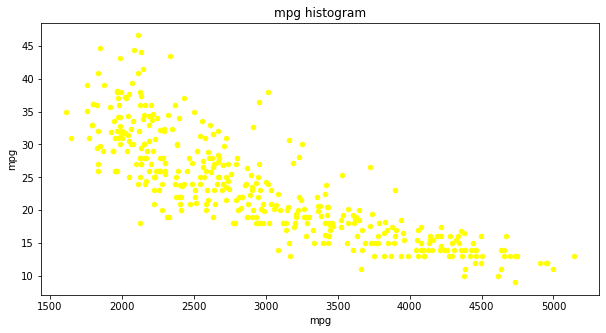

In [16]:
# scatter  : 2개의 변수로   x = 'weight', y= 'mpg'

df.plot(x = 'weight', y= 'mpg',kind='scatter', figsize=(10,5), color = 'yellow', s = 20)
plt.title('mpg histogram')
plt.xlabel('mpg')
plt.show()


0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
392    150.0
393    150.0
394    150.0
395    150.0
396    150.0
Name: cylinders, Length: 397, dtype: float64


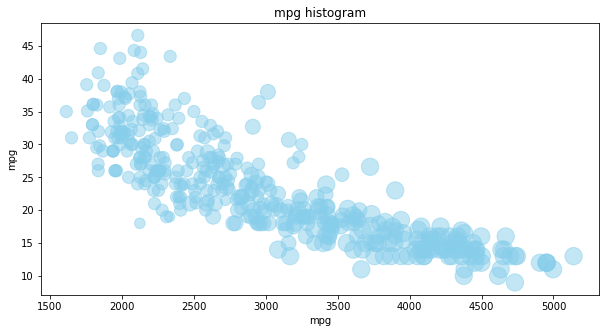

In [21]:
# scatter cylender  : 3개의 변수로 : x = 'weight', y= 'mpg', cylender_size
# bubble : cylenders_size로 점의 크기가 변경이 된다.
cylender_size = df.cylinders / df.cylinders.max() * 300
# print(cylender_size)
df.plot(x = 'weight', y= 'mpg',kind='scatter', figsize=(10,5), alpha = 0.5, color = 'skyblue', s = cylender_size)
plt.title('mpg histogram')
plt.xlabel('mpg')
plt.show()


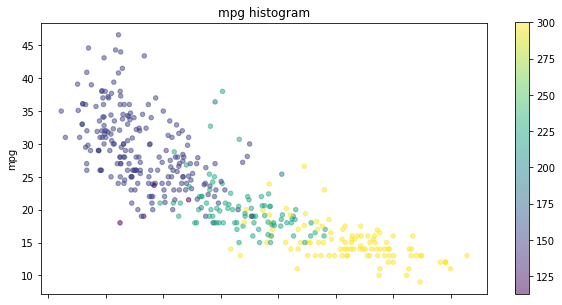

In [25]:
# scatter cylender  : 3개의 변수로 : x = 'weight', y= 'mpg', cylender_size
# cylenders_size를 컬러맵으로 사용
cylender_size = df.cylinders / df.cylinders.max() * 300
# print(cylender_size)
df.plot(x = 'weight', y= 'mpg',kind='scatter', figsize=(10,5), alpha = 0.5, cmap='viridis', c = cylender_size, s= 20)
plt.title('mpg histogram')
plt.xlabel('mpg')

# plot한것 저장
plt.savefig('./img/scatter.png')

plt.show()


           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       4982.8       1548       60922.5  833617.0        3731.4       18757   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         248  
2          70  
3          79  


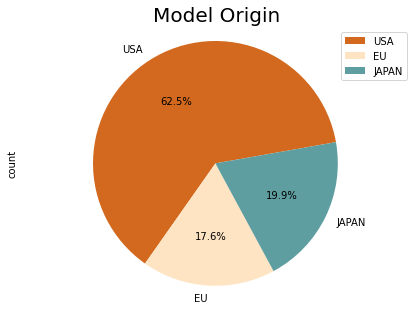

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from c

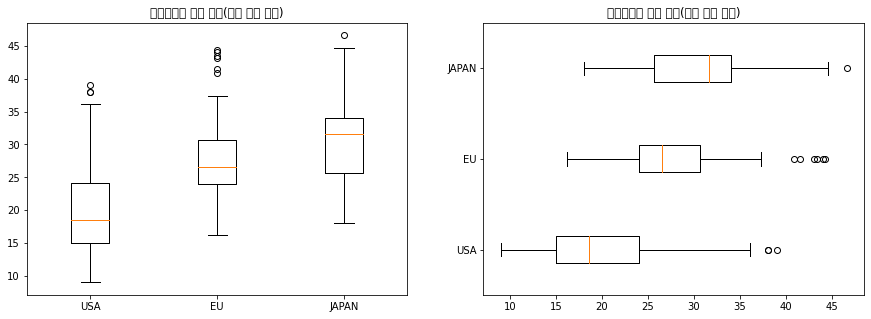

In [28]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()